<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">
<h1 style="display:none;">

# Introduction to Computing for Engineers and Computer Scientists<BR><BR>Chapter 4: Strings (and Lists)

## Survey Feedback

### Textbook

__I want the course to be more structured, focused on Python and follow the textbook.__

| <img src="../images/poll3.jpeg"> |
| : ---: |
| __Feedback III__ |

- Strong consensus to have more structure and align with textbook.


- I have to find the middle way between
    - The students' preferred approach.
    - My professional responsibility to follow the most effective approach that my experience leads me to use.
    
    
- I will figure this out somehow.

### Course Overall and Lectures

__Please rate your satisfaction with the course and direction, the amount you are learning and course effectiveness.__

| <img src="../images/poll1.jpeg"> |
| : ---: |
| __Feedback I__ |

__Please rate the style, effectiveness and usefulness of lectures.__

| <img src="../images/poll2.jpeg"> |
| : ---: |
| __Feedback II__ |

- General feedback
    - I - "Course overall" mean is 3.3 out of 5
    - II - "Lectures" means is 3.2 out of 5
    
    
- For comparison, of the previous 10 course I taught, the scores we approximately 4.2<br>
The courses were CS courses and not general requirements.


- This is not a popularity contest but the I clearly need to do better and some different things.

## Questions

### From Class?

### From Piazza

#### plt.plot() Function

__Simple Example__

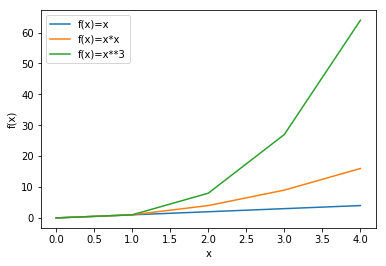

In [50]:
# matplotlib is a module that contains and exposes multiple functions.
# pyplot is a function in the module https://matplotlib.org/api/pyplot_api.html
import matplotlib.pyplot as plt

# Lists to hold f(x) for integers.
# The functions are f(x) = x, f(x)**2, f(x)**3
l = []
l2 = []
l3 = []

# Generate the data points.
for i in range(0,5):
    l.append(i)
    l2.append(i*i)
    l3.append(i*i*i)
    
# Add the graphs to the diagram, e.g. plot the data.
plt.plot(l)
plt.plot(l2)
plt.plot(l3)

# Add labels for axes and legends for plots.
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(["f(x)=x","f(x)=x*x","f(x)=x**3"])

# Show the diagram.
plt.show()

#### Playing [Moneyball](https://en.wikipedia.org/wiki/Moneyball)

- I need to build a baseball team.


- Should I try to acquire players that hit a lot of home runs?


- How does a team's homerun total relate to number of wins in a season?

##### Setup and Acquiring Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import pandas as pd
import pymysql
from pandas import DataFrame, Series
%matplotlib inline
import dbhelper

In [2]:
# Querying Database for all seasons where a team played 150 or more games and is still active today. 
# I get the data from a database but I could have and you would have used spreadsheets (CSVs)
query = '''select * from Teams 
inner join TeamsFranchises
on Teams.franchID = TeamsFranchises.franchID
where Teams.G >= 150 and TeamsFranchises.active = 'Y';
'''

# Creating dataframe from query.
Teams = dbhelper.run_query_to_d(query)

##### Various Plots -- Histogram

- First example was a line plot.


- We can also do histograms.

Get a general feeling for the distribution of number of wins/season.


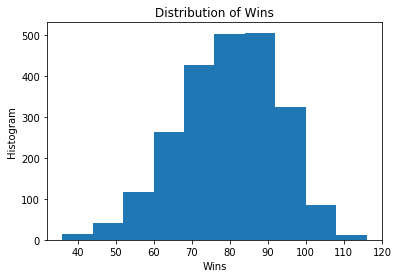

In [7]:
print("Get a general feeling for the distribution of number of wins/season.")
teams_df = df = pd.DataFrame(Teams)
# Plotting distribution of wins
plt.hist(df['W'])
plt.xlabel('Wins')
plt.ylabel('Histogram')
plt.title('Distribution of Wins')
plt.show()


##### Looking Directly at the Data

- All information about the 10 most winning teams in history.

In [5]:
df2 = df.sort_values(by=['W'], ascending=False)
print("Data for top 10 winning teams in basebal history.")
df2.head(10)

Data for top 10 winning teams in basebal history.


,2B,3B,AB,BB,BBA,BPF,CG,CS,DP,DivWin,...,franchID,franchName,lgID,name,park,teamID,teamIDBR,teamIDlahman45,teamIDretro,yearID
58,181,71,5018,448,446,106,125,,100,,...,CHC,Chicago Cubs,NL,Chicago Cubs,West Side Park II,CHN,CHC,CHN,CHN,1906
1831,310,38,5680,614,465,94,8,42,137,Y,...,SEA,Seattle Mariners,AL,Seattle Mariners,Safeco Field,SEA,SEA,SEA,SEA,2001
1735,290,31,5643,653,466,97,22,63,146,Y,...,NYY,New York Yankees,AL,New York Yankees,Yankee Stadium II,NYA,NYY,NYA,NYA,1998
787,188,39,5222,637,486,102,77,33,148,,...,CLE,Cleveland Indians,AL,Cleveland Indians,Cleveland Stadium,CLE,CLE,CLE,CLE,1954
365,291,103,5347,635,409,98,82,64,123,,...,NYY,New York Yankees,AL,New York Yankees,Yankee Stadium I,NYA,NYY,NYA,NYA,1927
112,218,92,5129,479,320,105,93,,100,,...,PIT,Pittsburgh Pirates,NL,Pittsburgh Pirates,Exposition Park/Forbes Field,PIT,PIT,PIT,PIT,1909
905,194,40,5559,543,542,95,47,18,180,,...,NYY,New York Yankees,AL,New York Yankees,Yankee Stadium I,NYA,NYY,NYA,NYA,1961
1052,234,29,5518,634,498,101,50,45,145,Y,...,BAL,Baltimore Orioles,AL,Baltimore Orioles,Memorial Stadium,BAL,BAL,BAL,BAL,1969
1201,278,37,5581,691,487,102,22,36,173,Y,...,CIN,Cincinnati Reds,NL,Cincinnati Reds,Riverfront Stadium,CIN,CIN,CIN,CIN,1975
1076,213,25,5545,717,469,101,60,39,148,Y,...,BAL,Baltimore Orioles,AL,Baltimore Orioles,Memorial Stadium,BAL,BAL,BAL,BAL,1970


- That was a little too much. How about a subset of the columns?

In [8]:
df3 = df2[['teamID', 'name', 'yearID', 'W', 'HR', 'R']]
df3.head(10)

,teamID,name,yearID,W,HR,R
58,CHN,Chicago Cubs,1906,116,20,705
1831,SEA,Seattle Mariners,2001,116,169,927
1735,NYA,New York Yankees,1998,114,207,965
787,CLE,Cleveland Indians,1954,111,156,746
365,NYA,New York Yankees,1927,110,158,975
112,PIT,Pittsburgh Pirates,1909,110,25,699
905,NYA,New York Yankees,1961,109,240,827
1052,BAL,Baltimore Orioles,1969,109,175,779
1201,CIN,Cincinnati Reds,1975,108,124,840
1076,BAL,Baltimore Orioles,1970,108,179,792


##### Various Diagrams -- Scatter Plot

- Cannot tell much from the top 10 teams. Need to look at more data.


- Scatter plot (HR,W) to see if there appears to be any correlation.

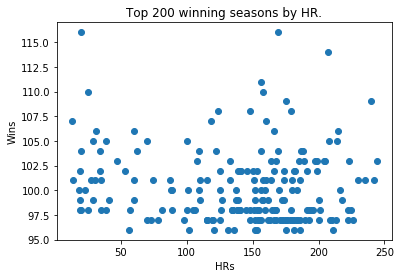

In [9]:
df3 = df2[['teamID', 'yearID', 'W', 'HR', 'R']]
df3=df3.head(200)
plt.xlabel('HRs')
plt.ylabel('Wins')
plt.title('Top 200 winning seasons by HR.')
plt.scatter(df3['HR'],df3['W'])
plt.show()

- Not much correlation. Let's check.

In [10]:
df4 = df3.corr('pearson')
df4

,yearID,W,HR,R
yearID,1.000000,-0.206981,0.774094,0.078001
W,-0.206981,1.000000,-0.089829,0.128339
HR,0.774094,-0.089829,1.000000,0.441314
R,0.078001,0.128339,0.441314,1.000000


- Observations
    - Wins and HRs are negatively correlated?
    - Surprisingly, or not, HRs and Year is positively correlated $\Rightarrow$ HRs are increasing over the years.
    - More analysis necessary before I can build a winning team.

## Working with Strings

### Overview

- A string is indicated between ' ' or " "


- Triple quotes preserve both the vertical and horizontal formatting of the string. Allows you to type tables, paragraphs, whatever and preserve the formatting.


- \ indicates a non-printable character. The two most common ones are
    - \n is carriage return, linefeed (CRLF)
    - \t is tab

In [3]:
a = "This is a string."
b = 'This is also a string'
c = '''
This is a string that preserves formatting.

Blank line

    Indent'''

print("a = ", a)
print("b = ", b)
print("c = ", c)


print("A line with three CRLF\n\n\nFollowed by another line.")
print("")
print("Text followed by tab.\tText after tab")

a =  This is a string.
b =  This is also a string
c =  
This is a string that preserves formatting.

Blank line

    Indent
A line with three CRLF


Follow by another line.

Text followed by tab.	Text after tab


### Representation

- Every character is "mapped" (associated) with an integer


- UTF-8, subset of Unicode, is such a mapping


- Functions
    - The function _ord()_ takes a character and returns its UTF-8 integer value, 
    - _chr()_ takes an integer and returns the UTF-8 character.


In [7]:
def show_ord(c):
    print("The ordinal value of",c,"is ", ord(c),".")
    
show_ord("H")
show_ord("\t")
show_ord("\n")

The ordinal value of H is  72
The ordinal value of 	 is  9
The ordinal value of 
 is  10


In [35]:
def show_char(n):
    print("The character for ordinal value",n,"is ", chr(n),"\b.")
    
    
show_char(72)
show_char(9)
show_char(0x00f0)
show_char(0x0E9C) # LATIN SMALL LETTER ETH
show_char(0x4EB0) # No idea

print("Following the textbook makes me " + chr(0x1f631))

print("Did you notice the <backspace> in the show_char function \b\b \b\b.")



The character for ordinal value 72 is  H .
The character for ordinal value 9 is  	 .
The character for ordinal value 240 is  ð .
The character for ordinal value 3740 is  ຜ .
The character for ordinal value 20144 is  亰 .
Following the textbook makes me 😱
Did you notice the <backspace> in the show_char function  .


- The character mappings are online, e.g.
    - [Emojis](http://unicode.org/emoji/charts-5.0/emoji-list.html)
    - [CJK](https://www.key-shortcut.com/en/writing-systems/%E6%96%87%E5%AD%97-chinese-cjk/cjk-characters-1/)
    - [Arabic](https://www.key-shortcut.com/en/writing-systems/%EF%BA%95%EF%BA%8F%D8%A2-arabic-alphabet/)
    
   
- That's "ممتاز"

### Single and Double Quotes

- Cannot mix at beginning and end of strings


In [36]:
s = 'Bad idea"


SyntaxError: EOL while scanning string literal (<ipython-input-36-7cb655a0dfdc>, line 1)

- Can use inside of each other, e.g. ' in "" and " in ''


In [42]:
print("Use double quotes on the outside and single quote for things like Don's lecture.\n")
print('And vice versa if you want to say Don said, "Do not mix quotes" because it is an error.\n')
print("You can alse use the magic <backslash> becase \\ is <backslash>, \' is <single quote> ") 
print("\tand \" is <double quote> in all strings.\n")

Use double quotes on the outside and single quote for things like Don's lecture.

And vice versa if you want to say Don said, "Do not mix quotes" because it is an error.

You can alse use the magic <backslash> becase \ is <backslash>, ' is <single quote> 
	and " is <double quote> in all strings.



### Strings are Sequences

- some_string[i] returns the i-th character in the string.


- Strings are sequences $\Rightarrow$ len() returns a string's length.
 
| <img src="../images/figure-4-1.jpeg"> |
| :---: |
| __Punch and Embody, Figure 4.1__ |
 

In [19]:
test_s = "Hello World!"
len_s = len(test_s)
print("The length of ",test_s,"is", len_s)

for i in range(0,(len_s)):
    print("test_s[" + str(i) + "] = '" + test_s[i] + "'.")

The length of  Hello World! is 12
test_s[0] = 'H'.
test_s[1] = 'e'.
test_s[2] = 'l'.
test_s[3] = 'l'.
test_s[4] = 'o'.
test_s[5] = ' '.
test_s[6] = 'W'.
test_s[7] = 'o'.
test_s[8] = 'r'.
test_s[9] = 'l'.
test_s[10] = 'd'.
test_s[11] = '!'.


In [21]:
print("How about backwards?")

for i in range(-1,-1*(len_s+1),-1):
    print("test_s[" + str(i) + "] = '" + test_s[i] + "'.")

How about backwards?
test_s[-1] = '!'.
test_s[-2] = 'd'.
test_s[-3] = 'l'.
test_s[-4] = 'r'.
test_s[-5] = 'o'.
test_s[-6] = 'W'.
test_s[-7] = ' '.
test_s[-8] = 'o'.
test_s[-9] = 'l'.
test_s[-10] = 'l'.
test_s[-11] = 'e'.
test_s[-12] = 'H'.


- Tell me more about that range thingy.


- [range()](https://docs.python.org/3/library/functions.html#func-range)
    - range(stop)
    - range(start, stop[, step])


- Rather than being a function, range is actually an immutable sequence type, as documented in Ranges and Sequence Types — list, tuple, range.

In [36]:
s = ""
for i in range(5):
    s = s + " " + str(i)
print("range(5)= " + s)

s2 = ""
for i in range(0,125,i*i):
    s = s + " " + str(i)
    
print("\nThis one is a little odd. The range is 0 to 125 but the step is i**i, or squares.")
print("range(0,125,i*i)= " + s)

print()
print("\nGet ready for blastoff!")
print("Guidance is internal.")
for cucumber in range(10,-5,-1):
    if cucumber == 10 or cucumber == 6:
        print("T-Minus",cucumber)
    elif cucumber == 8:
        print("Ignition sequence starts.")
    elif cucumber == 4:
        print("Ignition.")
    elif cucumber == 0:
        print("Lift Off!")
    elif cucumber == -2:
        print("We have lift off!")
        print("The clock has started.")
    elif cucumber == -4:
        print("We have cleared the tower!")
    elif cucumber > 0:
        print(str(cucumber))
    elif cucumber < 0:
        print("")
        

range(5)=  0 1 2 3 4

This one is a little odd. The range is 0 to 125 but the step is i**i, or squares.
range(0,125,i*i)=  0 1 2 3 4 0 16 32 48 64 80 96 112


Get ready for blastoff!
Guidance is internal.
T-Minus 10
9
Ignition sequence starts.
7
T-Minus 6
5
Ignition.
3
2
1
Lift Off!

We have lift off!
The clock has started.

We have cleared the tower!


### It Slices, It Dices


- Slicing, the [Veg-0-Matic](https://en.wikipedia.org/wiki/Veg-O-Matic) of string operations.


- Slicing is the ability to select a subsequence of the overall sequence
    - Uses the syntax [start : finish], where:
        - start is the index of where we start the subsequence
        - finish is the index of one after where we end the subsequence
        - if either start or finish are not provided, it defaults to the beginning of the sequence for start and the end of the sequence for finish.
   
   
- Slicing uses what is called a half-open range
    - The first index is included in the sequence
    - The last index is one after what is included


In [45]:
test_s = "Hello World!"
print("test_s[0:2] = " + test_s[0:2])
print("The half open rule is because test_s[1] = " + test_s[1] + " while test_s[2] = " + test_s[2])
print("test_s[3:] = " + test_s[3:])
print("test_s[:4] = " + test_s[:4])

test_s[0:2] = He
The half open rule is because test_s[1] = e while test_s[2] = l
test_s[3:] = lo World!
test_s[:4] = Hell


|  |
| :---: |
| <img src="../images/figure-4-2.jpeg"> |
| __Punch and Embody, Figure 4.2__ |
| <img src="../images/figure-4-3.jpeg"> |
| __Punch and Embody, Figure 4.3__ |
| <img src="../images/figure-4-4.jpeg"> |
| __Punch and Embody, Figure 4.4__ |
| <img src="../images/figure-4-5.jpeg"> |
| __Punch and Embody, Figure 4.5__ |

- But wait! If you order today, there is more!


- Slicing also takes three arguments: [start:finish:countBy]. Defaults are:
    - start is beginning
    - finish is end
    - countBy is 1

| <img src="../images/figure-4-6.jpeg"> |
| :---: |
| __Punch and Enbody, figure 4.6__ |

In [51]:
test_s = "123456789"
print("The even numbers in '" + test_s + "' are " + test_s[1::2])
print("The multiple of 4 in '" + test_s + "' are " + test_s[3::4])
print("How about multiples of 3 in '" + test_s + "', but backwards? And = ", test_s[-1::-3])

The even numbers in '123456789' are 2468
The multiple of 4 in '123456789' are 48
How about multiples of 3 in '123456789', but backwards? And =  963


### String Operators

- Strings are sequences, ergo they are iterable.



In [58]:
print("Iteration.")
print("The general concept.")
test_s1 = ["red", 1, "green", 11, "blue", 3.1416]
print("Iterating through " + str(test_s1))
for thingy in test_s1:
    print(thingy)
    
print("\nAlso works for 'Hello World!")
for lemon in "Hello World!":
    print(lemon)
    

Iteration.
The general concept.
Iterating through ['red', 1, 'green', 11, 'blue', 3.1416]
red
1
green
11
blue
3.1416

Also works for 'Hello World!
H
e
l
l
o
 
W
o
r
l
d
!


### Operators

- If you remember, I used the term _overloaded operator._ 
    - $+, *, \lt, \le, =, \ge, \gt,$ _!=_ work for numbers
    - And also work for sequences, including strings.
    
    
- You have seen me use $+,$ but will do so again and also use $*.$ And you can combine into expressions.

In [63]:
test_s = ""
for i in range(0,3):
    test_s = test_s + " spam"
print("test_s is " + test_s)

print("\nAnd you can multiple this.")
test_s = "spam " * 3 + "beans " + "spam " * 4
print(test_s)

test_s is  spam spam spam

And you can multiple this.
spam spam spam beans spam spam spam spam 


Directly from Punch and Enbody.

- Python 3 uses the Unicode mapping for characters. Allows for representing non-English characters.


- UTF-8, subset of Unicode, takes the English letters, numbers and punctuation marks and maps them to an integer.


- Single character comparisons are based on that number.


- It makes sense to compare within a sequence (lower case, upper case, digits). 
    - 'a' < 'b'    True
    - 'A' < 'B'    True
    - '1' < '9'    True


- Can be weird outside of the sequence
    - 'a' < 'A'    False
    - 'a' < '0'    False
    
    
- Whole strings: Compare the first element of each string
    - if they are equal, move on to the next character in each
    - if they are not equal, the relationship between those to characters are the relationship between the string
    - if one ends up being shorter (but equal), the shorter is smaller


In [64]:
print('a' < 'b')

True


In [65]:
print('a' <= 'aa')

True


In [66]:
print('aardvark' <= 'aardwolf')

True


In [67]:
print('aardvark' == 'aardwolf')

False


In [69]:
test_s = 'aardvark'
test_s2 = 'a'*2 + 'rdvark'
print("test_s = ", test_s)
print("test_s2 = ", test_s2)

test_s =  aardvark
test_s2 =  aardvark


In [70]:
test_s == test_s2

True

### Mutability

- You cannot change a string.


In [72]:
s = "spam"
s[1] = '@'


TypeError: 'str' object does not support item assignment

- But, you can make new ones.


In [75]:
s = "spam"
s = s[:2] + '@' + s[-1:]
s

'sp@m'

### Functions and Methods

#### The Concept

- Function
    - A function is a program that performs some operation. Its details are hidden (encapsulated), only it's interface provided.
    - A function takes some number of inputs (arguments) and returns a value based on the arguments and the function's operation.
    

- Method: A method is a variation on a function
    - like a function, it represents a program
    - like a function, it has input arguments and an output
    - Unlike a function, it is applied in the context of a particular object. 
    - This is indicated by the _dot notation_ invocation

__A function/method is a program? Really?__
<img src="../images/head_shake.jpg">

- _Dot notation:_ In general, dot notation looks like:
    - object.method(…)
    - It means that the object in front of the dot is calling a method that is associated with that object's type.
    - The method's that can be called are tied to the type of the object calling it. Each type has different methods.
    

- One way to sort of think of it is ```o.m(x,y)``` is like saying ```m(o,x,y),``` only the function is specific to ```o``` and there is no ```m()``` there is only ```o.m()``` 




In [79]:
s = "Hello World!"
s2 = s.upper()
print("s2 = ",s2)
print("s = ",s)
print("")
s3 = "España"
s4 = "España".upper()
print("s3 = ", s3)
print("s4 = ", s4)
print("")
s5 = "ممتاز"
s6 = s5.upper()
print("s5 = ", s5)
print("s6 = ", s6)
print("Because Arabic does not have upper and lower case.")

s2 =  HELLO WORLD!
s =  Hello World!

s3 =  España
s4 =  ESPAÑA

s5 =  ممتاز
s6 =  ممتاز
Because Arabic does not have upper and lower case.


#### The Methods

| <img src="../images/table-4-2.jpeg"> |
| :---: |
| __Punch and Enbody, 4.2__ |

- What of all of these functions do?


- Since we are following the textbook and structure, if I were not a nice person that would make an excellent, but staggeringly boring HW3.


- Some examples.

In [80]:
"is not a tile".istitle()

False

In [82]:
"Is A Title".istitle()

True

In [88]:
s = str(40).zfill(4)
print(s, "has type", type(s))
print("Why would you do this?")
print("Sometimes data structures require char representations of numbers (don't ask)")
print("")
print(1234, "is not a valid zip code")
print(str(1234).zfill(5), "is a valid zip code.")

0040 has type <class 'str'>
Why would you do this?
Sometimes data structures require char representations of numbers (don't ask)

1234 is not a valid zip code
01234 is a valid zip code.


- How do I figure out what functions do? How do I figure out what functions are available.

In [91]:
s = '''Dear Google,

I hope this query finds you in good health. I have the following questions, and I hope you can help.
1. What does this "translate()" method on a string do?
2. How do I tell if a string is numeric?

Thank you, and eagerly awaiting your reply.
'''

print(s)

Dear Google,

I hope this query finds you in good health. I have the following questions, and I hope you can help.
1. What does this "translate()" method on a string do?
2. How do I tell if a string is numeric?

Thank you, and eagerly awaiting your reply.



- Or ask on Piazza, read the book or go to https://docs.python.org/3/library/stdtypes.html#string-methods

### Formatting

- You will see things like


In [96]:
s = "Sorry. I meant to say {}"

s1 = s.format("'Great idea!'")
print(s1)

s2 = "Sorry. I did not mean to make this {} face. I meant to make this one {}!"
s3 = s2.format(chr(0x1f60b),chr(0x1f608))
print(s3)

Sorry. I meant to say 'Great idea!'
Sorry. I did not mean to make this 😋 face. I meant to make this one 😈!


- We will cover another time.


### Some Algorithms

#### Is a Palindrome?

- "A [palindrome](https://en.wikipedia.org/wiki/Palindrome) is a word, phrase, number, or other sequence of characters which reads the same backward as forward, such as madam or 'taco cat' or racecar."


- Implement a program to check if a word is a palindrome.


- We will make a couple of assumptions
    - Case does not matter
    - Punctuation is ignored



In [98]:
# Copyright 2017, 2013, 2011 Pearson Education, Inc., W.F. Punch & R.J.Enbody
# Palindrome tester
import string

original_str = input('Input a string:')
modified_str = original_str.lower()

bad_chars = string.whitespace + string.punctuation

for char in modified_str:
    if char in bad_chars:  # remove bad characters
        modified_str = modified_str.replace(char,'')
        
if modified_str == modified_str[::-1]: # it is a palindrome
    print(\
'The original string is:  {}\n\
 the modified string is: {}\n\
 the reversal is:        {}\n\
 String is a palindrome'.format(original_str, modified_str, modified_str[::-1]))
else:
    print(\
'The original string is:  {}\n\
 the modified string is: {}\n\
 the reversal is:        {}\n\
 String is not a palindrome'.format(original_str,modified_str,modified_str[::-1]))

Input a string:a'bba
The original string is:  a'bba
 the modified string is: abba
 the reversal is:        abba
 String is a palindrome


In [104]:
print("Whitespace characters are " + string.whitespace)
print("Where are they? They're there. They're whitespace fool.")
print("Their ord values are:")
for c in string.whitespace:
    print(ord(c))
    
print("\nPunctuation characters are: " + string.punctuation)

Whitespace characters are  	

Where are they? They're there. They're whitespace fool.
Their ord values are:
32
9
10
13
11
12
\Punctuation characters are: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


## Homework 3

- Will pull together
    - Functions.
    - String and methods.
    - Iteration, decisions.
    - Algorithms and decomposition.
    
    
- And give you some experience building a very, very simple 3-tier web application.

| <img src="../images/3-tier.png"> |
| :---: |
| __3-Tier Application__ |


- The three tiers
    - The database tier will be a simple, read-only file. (Reading files is in the textbook. I checked).
    - The middle tier (web application server) will be Python code running in [Flask](http://flask.pocoo.org/). (Web applications are in the textbook. I checked).
    - The user interface will be HTML running in a browser. (HTML is in the textbook. I checked).
    
    
- You want me to rely on the textbook. _Challenge accepted._


- The web application will
    - Accept a word input.
    - Suggest corrections, e.g. "Did you mean ..."
    

## Interactive versus Script

##### Simplest Solution

In [16]:
#!/usr/bin/env python3

import argparse

# Default is that the program is not interactive.
# Change from the prompt or a Jupyter cell if is interactive.
interactive = False


def get_args():

    result = None

    if not interactive:
        parser = argparse.ArgumentParser(
            description='Simulate flexible command line arguments.')
        parser.add_argument('--arg1', default=12, type=int, metavar='int',
                            help='Argument 1')
        args = parser.parse_args()
        result = args.arg1
    else:
        result = int(input("Enter value for arg1: "))

    return result


def simulating_simulation(arg):
    print("Simulating receiving arguments in a simulation. arg = ", arg)


def run_test():
    print("Testing.")
    test_result = get_args()
    print("Test result = ", test_result)
    print("Can call all of the other code with args now.")
    simulating_simulation(test_result)


run_test()

Testing.


usage: ipykernel_launcher.py [-h] [--arg1 int]
ipykernel_launcher.py: error: unrecognized arguments: -f /Users/donaldferguson/Library/Jupyter/runtime/kernel-c061a760-2bd2-42f8-b8e8-b089dbaed348.json


SystemExit: 2

/Users/donaldferguson/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [17]:
print("Change interactive to True and try again.")
interactive = True
run_test()

Change interactive to True and try again.
Testing.
Enter value for arg1: 2
Test result =  2
Can call all of the other code with args now.
Simulating receiving arguments in a simulation. arg =  2


##### Slightly More Sophisticated Solution

In [18]:
#!/usr/bin/env python3

import argparse

# main is the top-level module for this execution.
# Do not worry about this for now.
# An execution can either be interactive, i.e. something types/sends
# the Python statements, or driven from file input, e.g. ./foo --arg
#
# If there is no file associated with __main__, then we are interactive.
def is_interactive():
    import __main__ as main
    return not hasattr(main, '__file__')


# Default is that the program is not interactive.
# Change from the prompt or a Jupyter cell if is interactive.
interactive = is_interactive()


def get_args():

    result = None

    if not interactive:
        parser = argparse.ArgumentParser(
            description='Simulate flexible command line arguments.')
        parser.add_argument('--arg1', default=12, type=int, metavar='int',
                            help='Argument 1')
        args = parser.parse_args()
        result = args.arg1
    else:
        result = int(input("Enter value for arg1: "))

    return result


def simulating_simulation(arg):
    print("Simulating receiving arguments in a simulation. arg = ", arg)


def run_test():
    print("Testing.")
    test_result = get_args()
    print("Test result = ", test_result)
    print("Can call all of the other code with args now.")
    simulating_simulation(test_result)


run_test()

Testing.
Enter value for arg1: 33
Test result =  33
Can call all of the other code with args now.
Simulating receiving arguments in a simulation. arg =  33


#### Another Possible Solution

In [29]:

import argparse

def get_args():

    result = None

    try:
        parser = argparse.ArgumentParser(
           description='Simulate flexible command line arguments.')
        parser.add_argument('--arg1', default=12, type=int, metavar='int',
                            help='Argument 1')
        args = parser.parse_args()
        result = args.arg1
    except: 
        print("Got an arg parse exception. Trying a prompt.")
        result = int(input("Enter value for arg1: "))

    return result

get_args()

usage: ipykernel_launcher.py [-h] [--arg1 int]
ipykernel_launcher.py: error: unrecognized arguments: -f /Users/donaldferguson/Library/Jupyter/runtime/kernel-c061a760-2bd2-42f8-b8e8-b089dbaed348.json


Got an arg parse exception. Trying a prompt.
Enter value for arg1: 32


32